과제) 네이버 뉴스에서 본인이 선택한 검색어로 검색 한 결과를 json으로 저장 한 후    
1) 적절하지 않은 단어를 제거 한 후   
2) 단어 빈도수 기준으로 histogram 생성  
3) word cloud 생성.   

아래 code를 변형 하여 사용.   
가능 하면 본인의 client id와 client secret 사용 할 것. 2주차 과제에 업로드 된 code확인


In [1]:
import os
import sys
import urllib.request
import datetime
import time
import json

#client_id = '9DJjN_UoiVw9xsNrcWAG'
#client_secret = '6qEKmlidPH'

client_id = '9DJjN_UoiVw9xsNrcWAG'
client_secret = '6qEKmlidPH'



#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]       
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()


검색어를 입력하세요: 손흥민
[2022-11-19 11:27:46.786205] Url Request Success
[2022-11-19 11:27:48.091428] Url Request Success
[2022-11-19 11:27:49.400230] Url Request Success
[2022-11-19 11:27:50.700197] Url Request Success
[2022-11-19 11:27:52.001637] Url Request Success
[2022-11-19 11:27:53.361241] Url Request Success
[2022-11-19 11:27:54.675064] Url Request Success
[2022-11-19 11:27:56.042750] Url Request Success
[2022-11-19 11:27:57.407966] Url Request Success
[2022-11-19 11:27:58.731993] Url Request Success
HTTP Error 400: Bad Request
[2022-11-19 11:27:59.726830] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%86%90%ED%9D%A5%EB%AF%BC&start=1001&display=100
전체 검색 : 494059 건
가져온 데이터 : 1000 건
손흥민_naver_news.json SAVED


In [2]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu 

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


# 8장. 텍스트빈도분석 - 2) 한글 단어 분석 

## 한글 단어 분석을 위한 패키지 준비

In [3]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [4]:
inputFileName = '/content/손흥민_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '대표팀은 오늘 땡볕에도 오전과 오후 두 차례 고강도 훈련을 했는데, 얼굴 수술을 한 <b>손흥민</b> 선수도 모두... &quot; 안면 수술을 한 <b>손흥민</b>이 마스크를 쓴 채로 훈련 강도를 점차 끌어올린 가운데, 대표팀은 닷새 앞으로 다가온... ',
  'link': 'http://www.mbn.co.kr/pages/news/newsView.php?news_seq_no=4879965',
  'org_link': 'http://www.mbn.co.kr/pages/news/newsView.php?news_seq_no=4879965',
  'pDate': '2022-11-19 20:15:00',
  'title': '개막 D-1, H조 맞수들 입성 완료…<b>손흥민</b> 본격 훈련'},
 {'cnt': 2,
  'description': '(RCD마요르카)·<b>손흥민</b>(토트넘홋스퍼)·황희찬(울버햄튼)·나상호(FC서울)·송민규(전북현대), ▲ 공격수... 월드컵에서 두 경기 연속골을 넣은 한국 선수는 지금까지 유상철, <b>손흥민</b> 두 명 밖에 없다. 유상철은 1998 월드컵... ',
  'link': 'http://www.4th.kr/news/articleView.html?idxno=2028829',
  'org_link': 'http://www.4th.kr/news/articleView.html?idxno=2028829',
  'pDate': '2022-11-19 20:14:00',
  'title': '[카타르 월드컵] 12년만의 원정16강..남미 상대 첫승,예선2차전 첫승 등 관전...'},
 {'cnt': 3,
  'description': '한은수 | <b>손흥민</b>(30, 토트넘 홋스퍼)의 7번 마스크의 비밀이 밝혀졌다. 19일(현지시간) 오전 10시 카타르 도하의 알에글라 훈련장에서는 파울루 벤투 감독이 이끄는 축구대표팀의 훈련이 진행됐다. 훈련에는 <b>손흥민</b

### 1-2. 분석할 데이터 추출

In [5]:
message = ''

for item in data:
#    if 'message' in item.keys(): 
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''
        
message #출력하여 내용 확인

'대표팀은 오늘 땡볕에도 오전과 오후 두 차례 고강도 훈련을 했는데  얼굴 수술을 한  b 손흥민  b  선수도 모두     quot  안면 수술을 한  b 손흥민  b 이 마스크를 쓴 채로 훈련 강도를 점차 끌어올린 가운데  대표팀은 닷새 앞으로 다가온     RCD마요르카   b 손흥민  b  토트넘홋스퍼  황희찬 울버햄튼  나상호 FC서울  송민규 전북현대     공격수    월드컵에서 두 경기 연속골을 넣은 한국 선수는 지금까지 유상철   b 손흥민  b  두 명 밖에 없다  유상철은 1998 월드컵    한은수    b 손흥민  b  30  토트넘 홋스퍼 의 7번 마스크의 비밀이 밝혀졌다  19일 현지시간  오전 10시 카타르 도하의 알에글라 훈련장에서는 파울루 벤투 감독이 이끄는 축구대표팀의 훈련이 진행됐다  훈련에는  b 손흥민  b 을    최측근들이 잇따라 구속되면서 수사가 이재명 대표를 향하고 있습니다  4  안면보호 마스크를 쓰고 훈련하고 있는  b 손흥민  b 이 빠른 회복세를 보이며 오는 24일 우루과이와의 첫 경기 출장에 청신호가 켜졌습니다  b 손흥민  b 의 안면 보호 마스크에 적힌 숫자 7은 탈부착 가능한 스티커였다  19일 현지시간  오전 카타르 도하의 알 에글라 훈련장에서 대한민국 축구대표팀의 공식 훈련이 진행됐다  주장  b 손흥민  b 은 이날에도 검은색 안면    이영표   b 손흥민  b  이강인 홍명보를 말한다  b 손흥민  b   첫 3경기 연속 득점 월드컵에서 두 경기 연속골을 넣은 한국 선수는 것은 지금까지 유상철   b 손흥민  b  두 명 밖에 없다  유상철은 1998 월드컵 마지막 경기 벨기에전과 2002 월드컵 첫 경기 폴란드전에서 연속 득점을    설상가상  b 손흥민  b 까지 마르세유 원정에서 부상을 당하면서 고민이 깊었다  월드컵이 끝나면 다시 살인적인 스케줄이 진행된다  박싱데이는 물론 겨울 이적시장도 문을 연다  중앙 수비와 오른쪽 윙백 보강 가능성도       b 손흥민  b  3경기 연속 득

### 1-3. 품사 태깅 : 명사 추출

In [6]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['대표팀',
 '오늘',
 '땡볕',
 '오전',
 '오후',
 '두',
 '차례',
 '강도',
 '훈련',
 '얼굴',
 '수술',
 '손흥민',
 '선수',
 '모두',
 '안면',
 '수술',
 '손흥민',
 '이',
 '마스크',
 '채',
 '훈련',
 '강도',
 '점차',
 '가운데',
 '대표팀',
 '닷새',
 '앞',
 '마요르카',
 '손흥민',
 '토트넘홋스퍼',
 '황희',
 '찬',
 '울버햄튼',
 '나상호',
 '서울',
 '송민규',
 '전북현대',
 '공격수',
 '월드컵',
 '두',
 '경기',
 '골',
 '한국',
 '선수',
 '지금',
 '유상철',
 '손흥민',
 '두',
 '명',
 '유상철',
 '월드컵',
 '한은수',
 '손흥민',
 '토트넘',
 '홋스퍼',
 '의',
 '번',
 '마스크',
 '비밀',
 '현지',
 '시간',
 '오전',
 '카타르',
 '도하',
 '알',
 '글',
 '훈련',
 '파울루',
 '투',
 '감독',
 '축구',
 '대표팀',
 '훈련',
 '진행',
 '훈련',
 '손흥민',
 '최측근',
 '구속',
 '수사',
 '이재명',
 '대표',
 '향',
 '안면',
 '보호',
 '마스크',
 '훈련',
 '손흥민',
 '이',
 '회복',
 '세',
 '보이',
 '우루과이',
 '첫',
 '경기',
 '출장',
 '청',
 '신호',
 '손흥민',
 '의',
 '안면',
 '보호',
 '마스크',
 '숫자',
 '은',
 '탈',
 '부착',
 '스티커',
 '현지',
 '시간',
 '오전',
 '카타르',
 '도하',
 '알',
 '글',
 '훈련',
 '대한민국',
 '축구',
 '대표팀',
 '공식',
 '훈련',
 '진행',
 '주장',
 '손흥민',
 '은',
 '날',
 '검은색',
 '안면',
 '이영표',
 '손흥민',
 '이강인',
 '홍명보',
 '말',
 '손흥민',
 '첫',
 '경기',
 '연속',
 '득점',
 '월드컵',
 '두',
 

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [10]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'대표팀': 411,
         '오늘': 9,
         '땡볕': 2,
         '오전': 61,
         '오후': 176,
         '두': 51,
         '차례': 20,
         '강도': 22,
         '훈련': 585,
         '얼굴': 22,
         '수술': 93,
         '손흥민': 1527,
         '선수': 348,
         '모두': 35,
         '안면': 43,
         '이': 473,
         '마스크': 200,
         '채': 11,
         '점차': 1,
         '가운데': 34,
         '닷새': 2,
         '앞': 13,
         '마요르카': 12,
         '토트넘홋스퍼': 12,
         '황희': 90,
         '찬': 91,
         '울버햄튼': 9,
         '나상호': 12,
         '서울': 11,
         '송민규': 4,
         '전북현대': 4,
         '공격수': 34,
         '월드컵': 431,
         '경기': 179,
         '골': 74,
         '한국': 290,
         '지금': 31,
         '유상철': 30,
         '명': 33,
         '한은수': 1,
         '토트넘': 369,
         '홋스퍼': 86,
         '의': 273,
         '번': 48,
         '비밀': 8,
         '현지': 256,
         '시간': 307,
         '카타르': 568,
         '도하': 340,
         '알': 287,
         '글': 277,
         

In [11]:
word_count = dict()

#for tag, counts in count.most_common(80):
for tag, counts in count.most_common(70):  
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

손흥민 : 1527
훈련 : 585
카타르 : 568
축구 : 485
월드컵 : 431
대표팀 : 411
토트넘 : 369
선수 : 348
도하 : 340
시간 : 307
한국 : 290
현지 : 256
대한민국 : 216
마스크 : 200
경기 : 179
오후 : 176
감독 : 165
센터 : 151
트레이닝 : 146
부상 : 137
뉴스 : 126
골절 : 115
주장 : 111
파울루 : 98
출전 : 97
수술 : 93
황희 : 90
홋스퍼 : 86
국가대표팀 : 80
김민재 : 79
사인 : 76
가장 : 75
가나 : 75
상태 : 74
언론 : 74
투호 : 70
연맹 : 69
뉴시스 : 68
여러분 : 65
우루과이 : 64
캡틴 : 64
공감 : 64
독자 : 64
제보 : 62
오전 : 61
김진수 : 61
유니폼 : 59
소화 : 57
지난 : 57
득점 : 56
회복 : 55
에이스 : 54
착용 : 53


In [12]:
print(word_count)

{'손흥민': 1527, '훈련': 585, '카타르': 568, '축구': 485, '월드컵': 431, '대표팀': 411, '토트넘': 369, '선수': 348, '도하': 340, '시간': 307, '한국': 290, '현지': 256, '대한민국': 216, '마스크': 200, '경기': 179, '오후': 176, '감독': 165, '센터': 151, '트레이닝': 146, '부상': 137, '뉴스': 126, '골절': 115, '주장': 111, '파울루': 98, '출전': 97, '수술': 93, '황희': 90, '홋스퍼': 86, '국가대표팀': 80, '김민재': 79, '사인': 76, '가장': 75, '가나': 75, '상태': 74, '언론': 74, '투호': 70, '연맹': 69, '뉴시스': 68, '여러분': 65, '우루과이': 64, '캡틴': 64, '공감': 64, '독자': 64, '제보': 62, '오전': 61, '김진수': 61, '유니폼': 59, '소화': 57, '지난': 57, '득점': 56, '회복': 55, '에이스': 54, '착용': 53}


In [13]:
del word_count['손흥민']
del word_count['대한민국']


In [14]:
print(word_count)

{'훈련': 585, '카타르': 568, '축구': 485, '월드컵': 431, '대표팀': 411, '토트넘': 369, '선수': 348, '도하': 340, '시간': 307, '한국': 290, '현지': 256, '마스크': 200, '경기': 179, '오후': 176, '감독': 165, '센터': 151, '트레이닝': 146, '부상': 137, '뉴스': 126, '골절': 115, '주장': 111, '파울루': 98, '출전': 97, '수술': 93, '황희': 90, '홋스퍼': 86, '국가대표팀': 80, '김민재': 79, '사인': 76, '가장': 75, '가나': 75, '상태': 74, '언론': 74, '투호': 70, '연맹': 69, '뉴시스': 68, '여러분': 65, '우루과이': 64, '캡틴': 64, '공감': 64, '독자': 64, '제보': 62, '오전': 61, '김진수': 61, '유니폼': 59, '소화': 57, '지난': 57, '득점': 56, '회복': 55, '에이스': 54, '착용': 53}


### 히스토그램

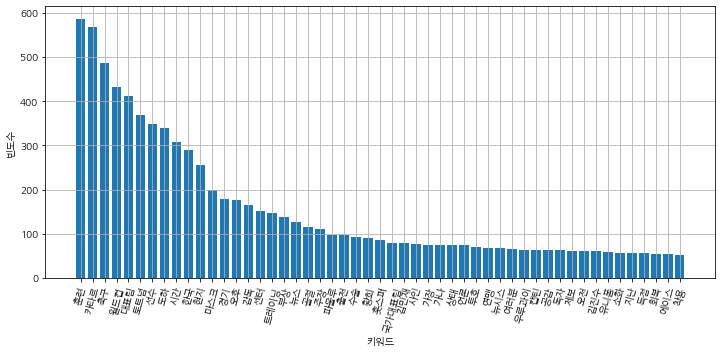

In [15]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

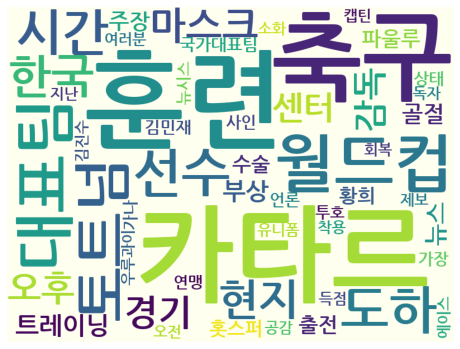

In [17]:
wc = WordCloud(path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file(inputFileName + '_cloud.jpg')